In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk

**DATA ACQUISITION**

In [3]:
df_true=pd.read_csv(r"News _dataset/True.csv")
df_true.sample(5)

,title,text,subject,date
15621,Berlusconi's center-right leads narrowly in Si...,"PALERMO, Italy (Reuters) - Silvio Berlusconi s...",worldnews,"November 5, 2017"
7900,Obama announces lifting of U.S. sanctions on M...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"October 7, 2016"
19792,"Nepal holds final round of municipal polls, et...",KATHMANDU (Reuters) - Nepalis began voting in ...,worldnews,"September 18, 2017"
12327,Kenyan police assaulted and raped women during...,NAIROBI (Reuters) - Several dozen women in Ken...,worldnews,"December 14, 2017"
11691,Saudi-led coalition to allow cranes into Yemen...,DUBAI (Reuters) - The Saudi-led coalition will...,worldnews,"December 20, 2017"


In [4]:
df_fake=pd.read_csv(r"News _dataset/Fake.csv")
df_fake.sample(5)

,title,text,subject,date
17807,WHY FORD’S DARK SECRET May Come Back To Haunt ...,"Founder of the Ford Motor Company, Henry Ford,...",left-news,"Oct 16, 2017"
9763,"CBS FIRES TOP LAWYER, Mother of 3, After Her E...","Hayley Geftman-Gold, a professional, a wife, a...",politics,"Oct 2, 2017"
21598,FLORIDA CAR DEALER THREATENED WITH FINES FOR D...,It doesn t get much more anti-American than fo...,left-news,"Jul 2, 2015"
4037,Rudy Giuliani Gives The Most INSANE Reason Wh...,The All Lives Matter movement may have just fo...,News,"October 26, 2016"
12008,BUH-BYE MEGYN…The Woman Who Miscalculated Her ...,"Megyn Kelly, who arrived at Fox News 12 years ...",politics,"Jan 3, 2017"


In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [46]:
df_true['isfake']=0
df_true.head(7)

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0


In [48]:
df_true

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [50]:
df_fake['isfake']=1
df_fake.head(7)

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1


In [52]:
data = pd.concat([df_true, df_fake], ignore_index=True)
data.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [54]:
data.drop(columns = ['date'], inplace = True,axis=1)


In [56]:
data

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [58]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data

,title,text,subject,isfake
0,"Trump creates panel to study voter fraud, supp...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,0
1,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,0
2,"Merkel: End smuggling and slavery, allow legal...",ABIDJAN (Reuters) - German Chancellor Angela M...,worldnews,0
3,German lawmakers visit Turkish air base but di...,BERLIN (Reuters) - German politicians visited ...,worldnews,0
4,Pro-Palestinian march in Paris ahead of Netany...,PARIS (Reuters) - Hundreds of pro-Palestinian ...,worldnews,0
...,...,...,...,...
44893,WOW! WATCH: CREEPY JOE BIDEN Just Can’t Keep H...,"Yesterday, we posted videos of Creepy Joe Bid...",politics,1
44894,TUCKER CARLSON Shocked At Lawyer’s Delusion On...,A Texas federal judge appointed by Obama has a...,left-news,1
44895,Donald Trump Jr Posts Disgusting Lie About Lo...,"This morning, a man drove his car into a crowd...",News,1
44896,Energised challenge by Tokyo governor exposes ...,TOKYO (Reuters) - A fast-growing challenge by ...,worldnews,0


In [60]:
print(data['isfake'].value_counts())
#Data is balnced

isfake
1    23481
0    21417
Name: count, dtype: int64


In [62]:
data['combined'] = data['title'] + ' ' + data['text']
data.head()

,title,text,subject,isfake,combined
0,"Trump creates panel to study voter fraud, supp...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,0,"Trump creates panel to study voter fraud, supp..."
1,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,0,Saudi police release teenager detained for dan...
2,"Merkel: End smuggling and slavery, allow legal...",ABIDJAN (Reuters) - German Chancellor Angela M...,worldnews,0,"Merkel: End smuggling and slavery, allow legal..."
3,German lawmakers visit Turkish air base but di...,BERLIN (Reuters) - German politicians visited ...,worldnews,0,German lawmakers visit Turkish air base but di...
4,Pro-Palestinian march in Paris ahead of Netany...,PARIS (Reuters) - Hundreds of pro-Palestinian ...,worldnews,0,Pro-Palestinian march in Paris ahead of Netany...


In [64]:
data.drop(columns=['title','text'],inplace=True, axis=1)

In [66]:
data.sample(5)

,subject,isfake,combined
38953,News,1,"California Tells NRA To F*ck Off, Passes Seve..."
38253,left-news,1,“IT’S A WAR!”…Armed Illegal Aliens Are Running...
27577,worldnews,0,Britain's May replaces defense minister in gro...
33262,worldnews,0,Indonesian court recognizes native religions i...
41048,politics,1,NYC COP Congratulates Trump Supporter For Educ...


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: combined, dtype: int64


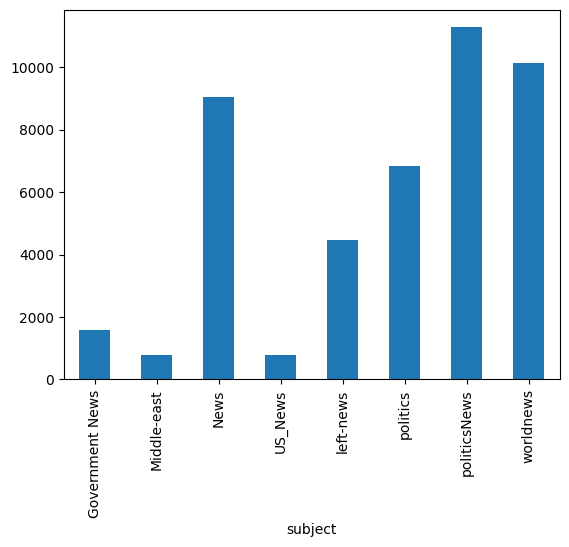

In [171]:
print(data.groupby(['subject'])['combined'].count())
data.groupby(['subject'])['combined'].count().plot(kind="bar")
plt.show()

**Text preprocessing**

In [69]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [71]:
stop_words=stopwords.words('english')


In [ ]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
# STOP WORDS REMOVAL
def preprocess(text):
    
    stop_words = set(STOPWORDS)  
    result = [
        token for token in gensim.utils.simple_preprocess(text) 
        if token not in stop_words and len(token) > 3
    ]
    # Convert list to a single string
    return " ".join(result)

In [75]:
data['combined'] = data['combined'].apply(preprocess)


In [85]:
data

,subject,isfake,combined
0,politicsNews,0,trump creates panel study voter fraud suppress...
1,worldnews,0,saudi police release teenager detained dancing...
2,worldnews,0,merkel smuggling slavery allow legal migration...
3,worldnews,0,german lawmakers visit turkish base dispute un...
4,worldnews,0,palestinian march paris ahead netanyahu visit ...
...,...,...,...
44893,politics,1,watch creepy biden hands body senator kelly ay...
44894,left-news,1,tucker carlson shocked lawyer delusion rejecti...
44895,News,1,donald trump posts disgusting london muslim ma...
44896,worldnews,0,energised challenge tokyo governor exposes ris...


In [87]:
import string


exclude = string.punctuation 

def remove_punc(text):
    # Remove punctuation from the text
    return text.translate(str.maketrans('', '', exclude))


data['combined'] = data['combined'].apply(remove_punc)


In [89]:
data

,subject,isfake,combined
0,politicsNews,0,trump creates panel study voter fraud suppress...
1,worldnews,0,saudi police release teenager detained dancing...
2,worldnews,0,merkel smuggling slavery allow legal migration...
3,worldnews,0,german lawmakers visit turkish base dispute un...
4,worldnews,0,palestinian march paris ahead netanyahu visit ...
...,...,...,...
44893,politics,1,watch creepy biden hands body senator kelly ay...
44894,left-news,1,tucker carlson shocked lawyer delusion rejecti...
44895,News,1,donald trump posts disgusting london muslim ma...
44896,worldnews,0,energised challenge tokyo governor exposes ris...


In [91]:
#Lowercase
data['combined'] = data['combined'].str.lower()


In [ ]:
import re
import string

def wordopt(text):
    # Handle NaN values
    if pd.isna(text):
        return ""
    
    # Remove anything inside square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Replace non-word characters with a space
    text = re.sub(r"\W", " ", text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


data['combined'] = data['combined'].apply(wordopt)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('punkt_tab')  


data['combined'] = data['combined'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [96]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
data['combined'] = data['combined'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
data

,subject,isfake,combined
0,politicsNews,0,"[trump, creates, panel, study, voter, fraud, s..."
1,worldnews,0,"[saudi, police, release, teenager, detained, d..."
2,worldnews,0,"[merkel, smuggling, slavery, allow, legal, mig..."
3,worldnews,0,"[german, lawmaker, visit, turkish, base, dispu..."
4,worldnews,0,"[palestinian, march, paris, ahead, netanyahu, ..."
...,...,...,...
44893,politics,1,"[watch, creepy, biden, hand, body, senator, ke..."
44894,left-news,1,"[tucker, carlson, shocked, lawyer, delusion, r..."
44895,News,1,"[donald, trump, post, disgusting, london, musl..."
44896,worldnews,0,"[energised, challenge, tokyo, governor, expose..."


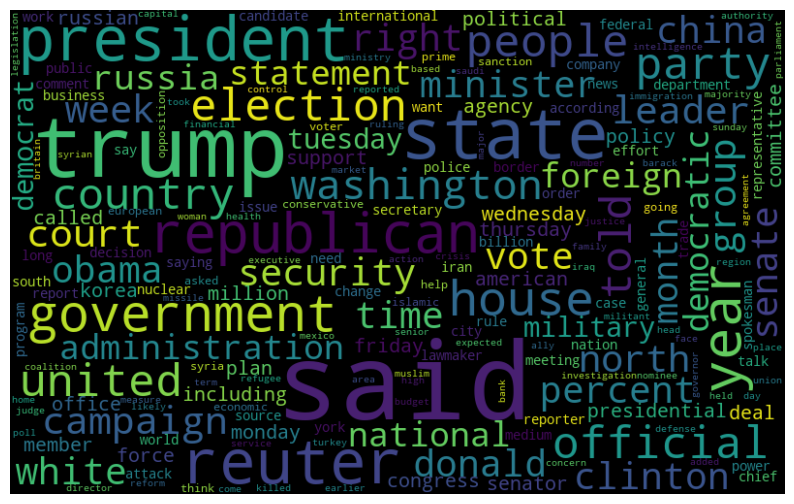

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter data to get true entries
real_data = data[data["isfake"] == 0]

# Join all the words from the 'combined' column into a single string
all_words = ' '.join([' '.join(text) for text in real_data['combined']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500,
                       max_font_size=110,
                       collocations=False).generate(all_words)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


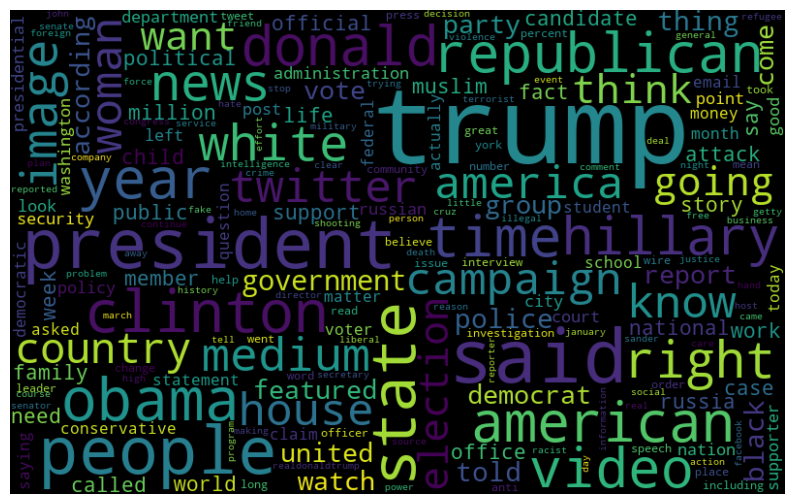

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter data to get fake entries 
fake_data = data[data["isfake"] == 1]

# Join all the words from the 'combined' column into a single string
all_fake_words = ' '.join([' '.join(text) for text in fake_data['combined']])

# Generate the word cloud
wordcloud_fake = WordCloud(width=800, height=500,
                           max_font_size=110,
                           collocations=False).generate(all_fake_words)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()



**Text Vectorization**

In [113]:

data['combined'] = data['combined'].apply(lambda x: ' '.join(x))


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['combined'])


In [121]:
y=data['isfake']

**MODELLING**

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [125]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [131]:
model_list = [("Logistic Regression", LogisticRegression(random_state=42)), 
              ("Random Forest", RandomForestClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=42))]

In [145]:
import pandas as pd
from sklearn.metrics import accuracy_score

models = pd.DataFrame(columns=["Model", "Accuracy Score"])

for name, clf in model_list:
    
    X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
    X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test
    
    clf.fit(X_train_dense, y_train)
    predictions = clf.predict(X_test_dense)
    score = accuracy_score(y_test, predictions)
    
    # Create a new row and append it to the DataFrame
    new_row = pd.DataFrame({"Model": [name], "Accuracy Score": [score]})
    models = pd.concat([models, new_row], ignore_index=True)




C:\Users\hp\AppData\Local\Temp\ipykernel_31208\3419612132.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, new_row], ignore_index=True)


In [149]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,Random Forest,0.998218
6,Decision Tree,0.995397
2,Support Vector Machines,0.993244
0,Logistic Regression,0.984113
4,Bernoulli Naive Bayes,0.963697
3,Gaussian Naive Bayes,0.917669
5,KNN,0.842168


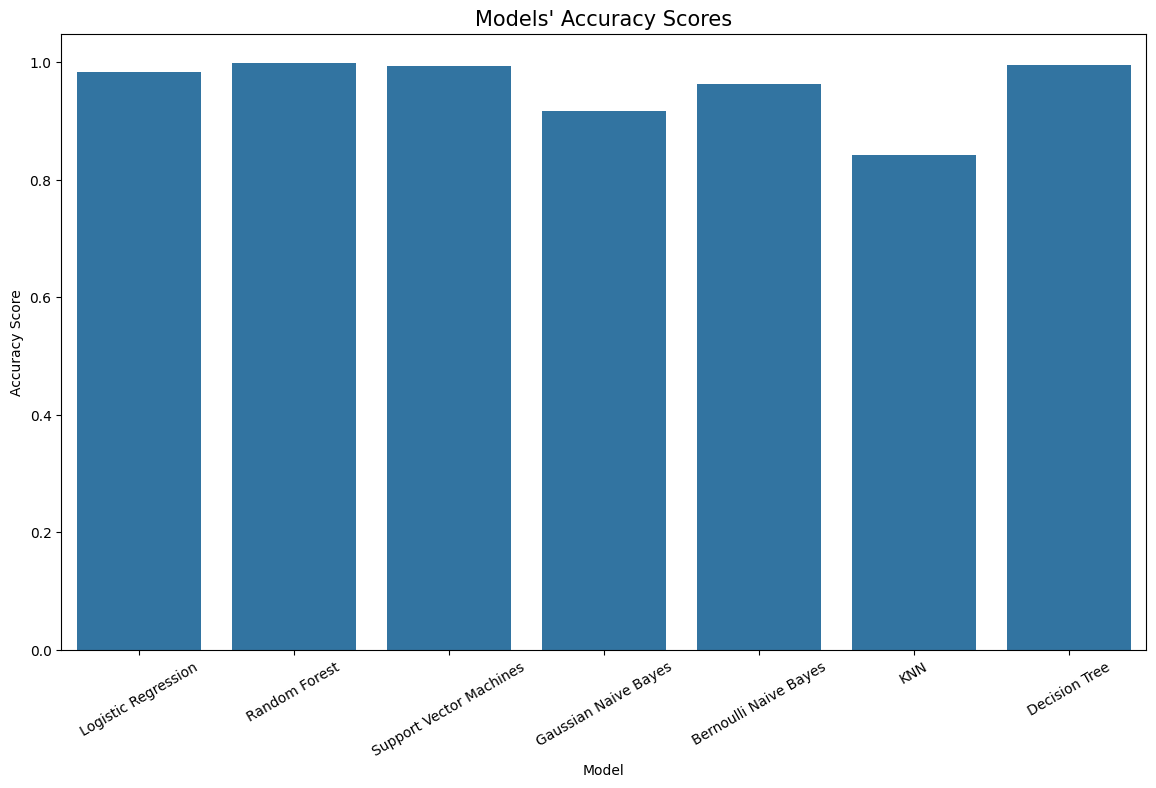

In [151]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

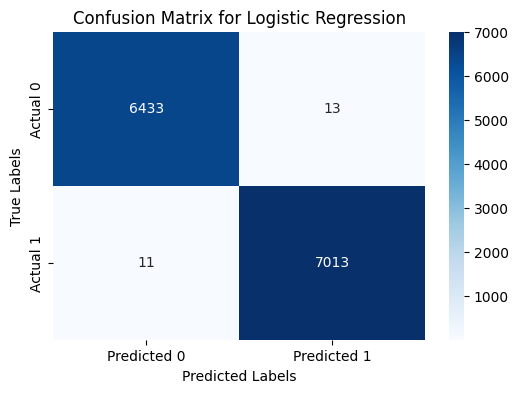

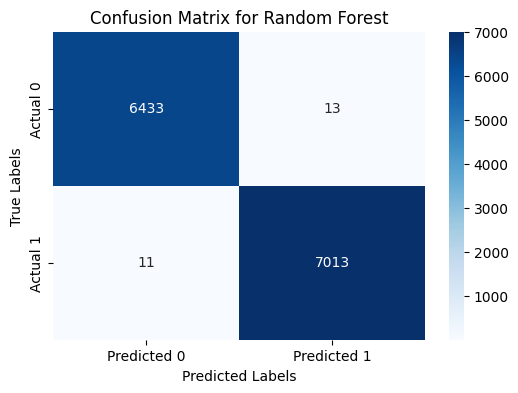

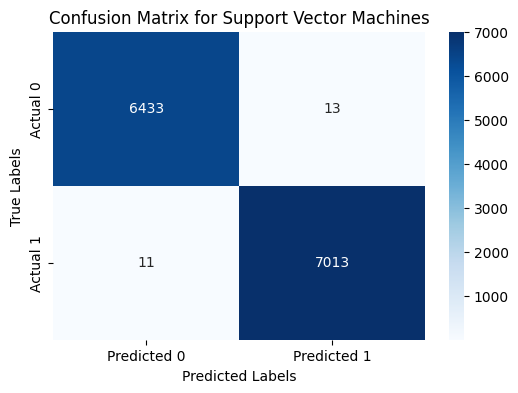

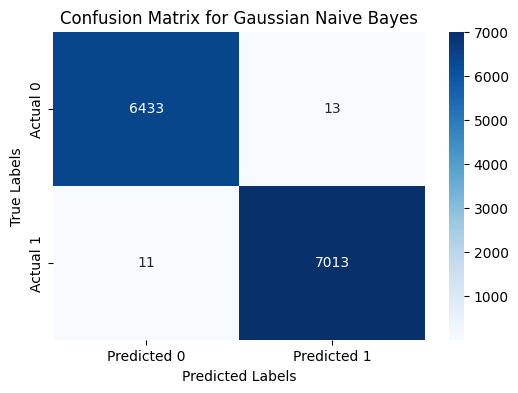

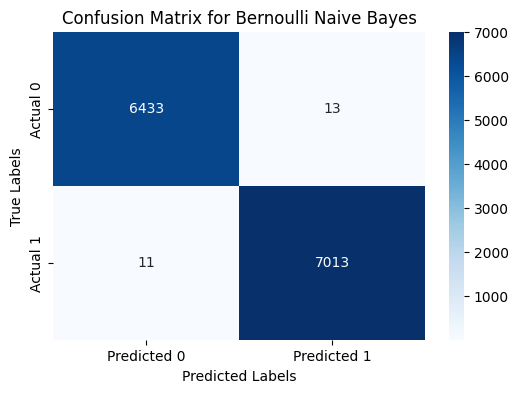

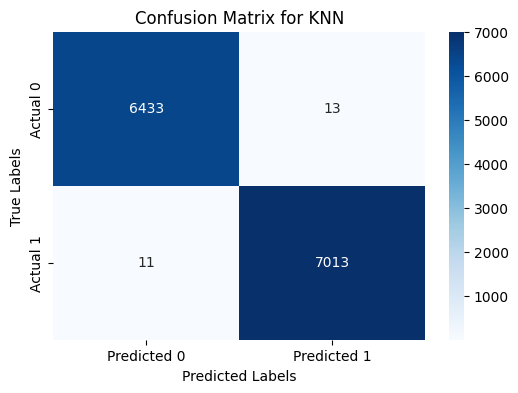

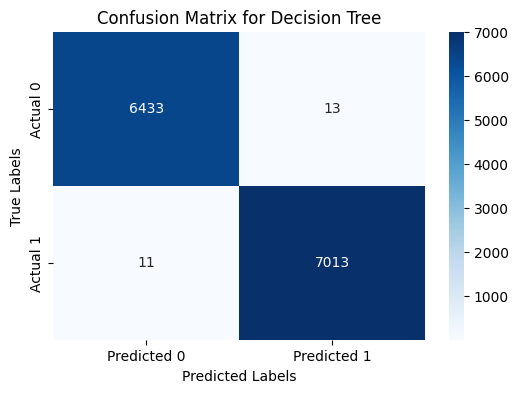

Confusion Matrix for Logistic Regression:
[[6433   13]
 [  11 7013]]

Confusion Matrix for Random Forest:
[[6433   13]
 [  11 7013]]

Confusion Matrix for Support Vector Machines:
[[6433   13]
 [  11 7013]]

Confusion Matrix for Gaussian Naive Bayes:
[[6433   13]
 [  11 7013]]

Confusion Matrix for Bernoulli Naive Bayes:
[[6433   13]
 [  11 7013]]

Confusion Matrix for KNN:
[[6433   13]
 [  11 7013]]

Confusion Matrix for Decision Tree:
[[6433   13]
 [  11 7013]]



In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrices = {}


for name, clf in model_list:
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    confusion_matrices[name] = cm
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Display the confusion matrices stored in the dictionary
for name, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {name}:\n{cm}\n")


**Evaluation**

In [160]:
for name, clf in model_list:
    
    precision = precision_score(y_test, predictions, average='binary')  
    recall = recall_score(y_test, predictions, average='binary')
    f1 = f1_score(y_test, predictions, average='binary')
    

    models.loc[models['Model'] == name, 'Precision'] = precision
    models.loc[models['Model'] == name, 'Recall'] = recall
    models.loc[models['Model'] == name, 'F1 Score'] = f1

# Display the updated models DataFrame
print(models)



                     Model  Accuracy Score  Precision    Recall  F1 Score
0      Logistic Regression        0.984113    0.99815  0.998434  0.998292
1            Random Forest        0.998218    0.99815  0.998434  0.998292
2  Support Vector Machines        0.993244    0.99815  0.998434  0.998292
3     Gaussian Naive Bayes        0.917669    0.99815  0.998434  0.998292
4    Bernoulli Naive Bayes        0.963697    0.99815  0.998434  0.998292
5                      KNN        0.842168    0.99815  0.998434  0.998292
6            Decision Tree        0.995397    0.99815  0.998434  0.998292


In [ ]:
#Rf obtained highest accuracy